In [4]:
import tensorflow as tf
import mediapipe as mp
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time

In [2]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
mp_holistic=mp.solutions.holistic #holisitic model to make detections
mp_drawing=mp.solutions.drawing_utils # drawing utilities to draw detections

In [10]:
#function to read detections and draw them
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB) #since opencv reads in bgr format but for mediapipe we need to read in egb format
    image.flags.writeable=False #image is not writeable
    results=model.process(image) #detecting using mediapipe
    image.flags.writeable=True #image is now writeable
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,results

In [18]:
#we grab our landmarks and render them onto the image
def draw_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS) #draw face connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS) #draw pose connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #draw left hand connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #draw right hand connections
    

In [31]:
#we will style our landmarks
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),#colour landmarks
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)) #colour connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),#colour landmarks
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)) #colour connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),#colour landmarks
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)) #colour connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(80,110,10),thickness=1,circle_radius=1),#colour landmarks
                              mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)) #colour connections

In [59]:
cap=cv2.VideoCapture(0) # accessing our webcam where cap is variable to read our feed
#in place of 0 you can specify your video to perform the detections on a video
#access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        #read the feed
        ret,frame=cap.read()
        #make detections
        image,results=mediapipe_detection(frame,holistic)
        #print(results)
        
        #draw landmarks
        draw_styled_landmarks(image,results) #applying to realtime loop
        
        #show to screen
        cv2.imshow('OpenCV Feed',image)
        if cv2.waitKey(10) & 0xFF==ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()    

In [16]:
results.face_landmarks #to get landmarks of face
results.face_landmarks.landmark #to get landmarks as list
len(results.face_landmarks.landmark) #to get number of landmarks

landmark {
  x: 0.5663236975669861
  y: 0.8345175385475159
  z: -0.02782147005200386
}
landmark {
  x: 0.5653103590011597
  y: 0.7870724201202393
  z: -0.04818836599588394
}
landmark {
  x: 0.5660666227340698
  y: 0.8023002743721008
  z: -0.026274660602211952
}
landmark {
  x: 0.5583824515342712
  y: 0.7476770877838135
  z: -0.03449089080095291
}
landmark {
  x: 0.5652658939361572
  y: 0.7740380764007568
  z: -0.050765927881002426
}
landmark {
  x: 0.565549373626709
  y: 0.7580982446670532
  z: -0.046631038188934326
}
landmark {
  x: 0.566618025302887
  y: 0.7214202880859375
  z: -0.02123330347239971
}
landmark {
  x: 0.5058514475822449
  y: 0.7246459722518921
  z: 0.015909574925899506
}
landmark {
  x: 0.5671526789665222
  y: 0.6964015364646912
  z: -0.01472452376037836
}
landmark {
  x: 0.5673530697822571
  y: 0.680448055267334
  z: -0.01589452661573887
}
landmark {
  x: 0.5676674842834473
  y: 0.6207011938095093
  z: -0.0026066317223012447
}
landmark {
  x: 0.5664085745811462
  y: 0

The face and hand landmark models will return no values/error if nothing is detected.The pose model will return landmarks but the visibility value inside of each landmark will be low

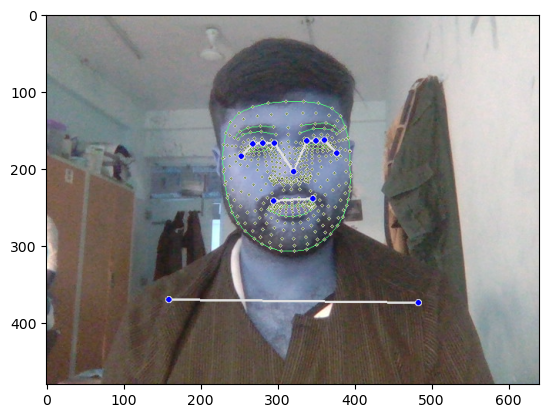

In [28]:
plt.imshow(image) #to show the last frame

The draw_landmarks function does not return the image but rather applies the landmark visualizations to the current image in place

In [19]:
draw_landmarks(frame,results)

In [37]:
results.pose_landmarks #to access last frame landmarks

landmark {
  x: 0.5335317254066467
  y: 0.315752774477005
  z: -1.3908253908157349
  visibility: 0.9998491406440735
}
landmark {
  x: 0.5655602216720581
  y: 0.2442736029624939
  z: -1.3518402576446533
  visibility: 0.9997954964637756
}
landmark {
  x: 0.5855787992477417
  y: 0.24596908688545227
  z: -1.3518439531326294
  visibility: 0.9997492432594299
}
landmark {
  x: 0.6049262881278992
  y: 0.2478213906288147
  z: -1.3521393537521362
  visibility: 0.9997395873069763
}
landmark {
  x: 0.4982079863548279
  y: 0.23547139763832092
  z: -1.3533891439437866
  visibility: 0.9998156428337097
}
landmark {
  x: 0.4732254445552826
  y: 0.23217988014221191
  z: -1.3531806468963623
  visibility: 0.9998062252998352
}
landmark {
  x: 0.45154157280921936
  y: 0.22864188253879547
  z: -1.3534371852874756
  visibility: 0.9998254776000977
}
landmark {
  x: 0.6363174319267273
  y: 0.2553046643733978
  z: -0.90455561876297
  visibility: 0.9997755289077759
}
landmark {
  x: 0.416144460439682
  y: 0.24112

Now we concatenate these values into a numpy array to extract these keypoints.

In [43]:
len(results.pose_landmarks.landmark)

33

In [38]:
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility]) #here we have extracted keypoints for one of our landmarks

In [41]:
#now we will extract keypounts for all landmarks
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)
    #here we will get a list

In [57]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten()
#here we will get an array

In [52]:
pose #to view the numpy array

array([[ 5.33531725e-01,  3.15752774e-01, -1.39082539e+00,
         9.99849141e-01],
       [ 5.65560222e-01,  2.44273603e-01, -1.35184026e+00,
         9.99795496e-01],
       [ 5.85578799e-01,  2.45969087e-01, -1.35184395e+00,
         9.99749243e-01],
       [ 6.04926288e-01,  2.47821391e-01, -1.35213935e+00,
         9.99739587e-01],
       [ 4.98207986e-01,  2.35471398e-01, -1.35338914e+00,
         9.99815643e-01],
       [ 4.73225445e-01,  2.32179880e-01, -1.35318065e+00,
         9.99806225e-01],
       [ 4.51541573e-01,  2.28641883e-01, -1.35343719e+00,
         9.99825478e-01],
       [ 6.36317432e-01,  2.55304664e-01, -9.04555619e-01,
         9.99775529e-01],
       [ 4.16144460e-01,  2.41121113e-01, -9.10534680e-01,
         9.99870658e-01],
       [ 5.65641761e-01,  3.88665289e-01, -1.21102798e+00,
         9.99875844e-01],
       [ 4.86927330e-01,  3.83436084e-01, -1.21235013e+00,
         9.99923885e-01],
       [ 7.39521742e-01,  5.61964691e-01, -5.94584882e-01,
      

In [53]:
pose.shape

(33, 4)

In [54]:
pose.flatten() #to get all landmarks in one big array

array([ 5.33531725e-01,  3.15752774e-01, -1.39082539e+00,  9.99849141e-01,
        5.65560222e-01,  2.44273603e-01, -1.35184026e+00,  9.99795496e-01,
        5.85578799e-01,  2.45969087e-01, -1.35184395e+00,  9.99749243e-01,
        6.04926288e-01,  2.47821391e-01, -1.35213935e+00,  9.99739587e-01,
        4.98207986e-01,  2.35471398e-01, -1.35338914e+00,  9.99815643e-01,
        4.73225445e-01,  2.32179880e-01, -1.35318065e+00,  9.99806225e-01,
        4.51541573e-01,  2.28641883e-01, -1.35343719e+00,  9.99825478e-01,
        6.36317432e-01,  2.55304664e-01, -9.04555619e-01,  9.99775529e-01,
        4.16144460e-01,  2.41121113e-01, -9.10534680e-01,  9.99870658e-01,
        5.65641761e-01,  3.88665289e-01, -1.21102798e+00,  9.99875844e-01,
        4.86927330e-01,  3.83436084e-01, -1.21235013e+00,  9.99923885e-01,
        7.39521742e-01,  5.61964691e-01, -5.94584882e-01,  9.98571813e-01,
        2.81616658e-01,  5.65281034e-01, -5.59169054e-01,  9.99396563e-01,
        8.36116016e-01,  

In [58]:
pose.shape #after we flatten the array

(132,)

In [65]:
results.left_hand_landmarks